In [27]:
import numpy as np

import torch
import matplotlib.pyplot as plt
import seaborn as sns
import seml.database as db_utils
from pathlib import Path

import torch

from itertools import product

from statsmodels.stats.proportion import proportion_confint

import pandas as pd

import os

import sys
sys.path.append('..')
from utils import load_results, plot_results_dict

#%matplotlib inline

In [28]:
collection = 'equivariance_force_fields_cert_rebuttal'


jk_config = {
    'username': 'your-username',
    'password': 'your-password',
    'host': 'your-host-address',
    'port': 27017,
    'db_name': 'your-dbname'
}

col = db_utils.get_collection(collection, mongodb_config=jk_config)

In [29]:
def get_experiments(col, restrictions={}):
    
    restrictions['status'] = 'COMPLETED'

    if col.count_documents(restrictions) == 0:
        raise ValueError('No matches!')

    exps = col.find(restrictions, {'config':1, 'result': 1, '_id': 1})
    
    return exps

In [30]:
def get_certificates(raw_results_file):
    raw_results = torch.load(raw_results_file)

    budgets = raw_results['budgets'][0]
    assert torch.all(budgets == torch.stack(raw_results['budgets'], dim=0))

    average_error = np.mean(raw_results['pred_errors'])
    n_abstains = np.sum(raw_results['abstains'])
    max_rad = raw_results['max_rad']
    n_molecules = len(raw_results['certified_output_distances'])

    average_certified_output_distances = None

    for abstain, dists in zip(raw_results['abstains'], raw_results['certified_output_distances']):
        if abstain:
            continue
        else:
            if average_certified_output_distances is None:
                average_certified_output_distances = dists / (n_molecules - n_abstains)
            else:
                average_certified_output_distances += dists / (n_molecules - n_abstains)

    return {
        'average_error': average_error,
        'n_abstains': n_abstains,
        'max_rad': max_rad,
        'budgets': budgets.numpy(),
        'average_certified_output_distances': average_certified_output_distances.numpy()
    }

In [31]:
def generate_exp_result_dict(exp):

    result_dict = {}

    result_dict['dataset'] = exp['config']['dataset']
    result_dict['seed'] = exp['config']['train_loading']['restrictions']['model_seed']

    result_dict['target'] = exp['config']['target']
    result_dict['std'] = exp['config']['smoothing_params']['std']
    result_dict['delta'] = exp['config']['smoothing_params']['delta']

    result_dict['raw_results_file'] = exp['result']['save_file']

    cert_dict = get_certificates(result_dict['raw_results_file'])

    result_dict.update(cert_dict)

    return result_dict

In [32]:
# Use commented out code if you want to use your ow ndata
#experiments = get_experiments(col, restrictions={'config.n_molecules': 1000, 'config.model_name': 'painn'})
#results = load_results(
#            generate_exp_result_dict,
#            experiments,
#            results_file='./raw_data_painn',
#            overwrite=True
#            )

results = load_results(
            generate_exp_result_dict,
            None,
            results_file='./raw_data_painn',
            overwrite=False
            )

In [33]:
results

,dataset,seed,target,std,delta,raw_results_file,average_error,n_abstains,max_rad,budgets,average_certified_output_distances
0,MD17,0,aspirin,0.00001,0.05,/nfs/staff-hdd/schuchaj/equivariance_certifica...,1.031934,0,0.00002,"[0.0, 2.0139126e-08, 4.0278252e-08, 6.041738e-...","[0.0, 0.05532359, 0.055343, 0.055362783, 0.055..."
1,MD17,0,uracil,0.00001,0.05,/nfs/staff-hdd/schuchaj/equivariance_certifica...,0.583337,0,0.00002,"[0.0, 2.0139126e-08, 4.0278252e-08, 6.041738e-...","[0.0, 0.05951495, 0.059544303, 0.059572816, 0...."
2,MD17,0,ethanol,0.00001,0.05,/nfs/staff-hdd/schuchaj/equivariance_certifica...,0.739579,0,0.00002,"[0.0, 2.0139126e-08, 4.0278252e-08, 6.041738e-...","[0.0, 0.039879568, 0.03990233, 0.039924726, 0...."
3,MD17,0,benzene,0.00001,0.05,/nfs/staff-hdd/schuchaj/equivariance_certifica...,0.397140,0,0.00002,"[0.0, 2.0139126e-08, 4.0278252e-08, 6.041738e-...","[0.0, 0.052883916, 0.052908216, 0.052932363, 0..."
4,MD17,0,napthalene,0.00001,0.05,/nfs/staff-hdd/schuchaj/equivariance_certifica...,0.391976,0,0.00002,"[0.0, 2.0139126e-08, 4.0278252e-08, 6.041738e-...","[0.0, 0.05388552, 0.053904764, 0.0539246, 0.05..."
5,MD17,0,toluene,0.00001,0.05,/nfs/staff-hdd/schuchaj/equivariance_certifica...,0.462269,0,0.00002,"[0.0, 2.0139126e-08, 4.0278252e-08, 6.041738e-...","[0.0, 0.048810467, 0.048830494, 0.04885031, 0...."
6,MD17,0,salicylic acid,0.00001,0.05,/nfs/staff-hdd/schuchaj/equivariance_certifica...,0.755601,0,0.00002,"[0.0, 2.0139126e-08, 4.0278252e-08, 6.041738e-...","[0.0, 0.055011015, 0.055032566, 0.055054195, 0..."
7,MD17,0,malonaldehyde,0.00001,0.05,/nfs/staff-hdd/schuchaj/equivariance_certifica...,0.984949,0,0.00002,"[0.0, 2.0139126e-08, 4.0278252e-08, 6.041738e-...","[0.0, 0.049461737, 0.04949317, 0.049524542, 0...."
8,MD17,1,aspirin,0.00001,0.05,/nfs/staff-hdd/schuchaj/equivariance_certifica...,1.066903,0,0.00002,"[0.0, 2.0139126e-08, 4.0278252e-08, 6.041738e-...","[0.0, 0.055344056, 0.055363808, 0.055383656, 0..."
9,MD17,1,uracil,0.00001,0.05,/nfs/staff-hdd/schuchaj/equivariance_certifica...,0.874865,0,0.00002,"[0.0, 2.0139126e-08, 4.0278252e-08, 6.041738e-...","[0.0, 0.05915055, 0.059179347, 0.059207942, 0...."


In [34]:
res = results.loc[results['std'] == 0.00001]
res

,dataset,seed,target,std,delta,raw_results_file,average_error,n_abstains,max_rad,budgets,average_certified_output_distances
0,MD17,0,aspirin,0.00001,0.05,/nfs/staff-hdd/schuchaj/equivariance_certifica...,1.031934,0,0.00002,"[0.0, 2.0139126e-08, 4.0278252e-08, 6.041738e-...","[0.0, 0.05532359, 0.055343, 0.055362783, 0.055..."
1,MD17,0,uracil,0.00001,0.05,/nfs/staff-hdd/schuchaj/equivariance_certifica...,0.583337,0,0.00002,"[0.0, 2.0139126e-08, 4.0278252e-08, 6.041738e-...","[0.0, 0.05951495, 0.059544303, 0.059572816, 0...."
2,MD17,0,ethanol,0.00001,0.05,/nfs/staff-hdd/schuchaj/equivariance_certifica...,0.739579,0,0.00002,"[0.0, 2.0139126e-08, 4.0278252e-08, 6.041738e-...","[0.0, 0.039879568, 0.03990233, 0.039924726, 0...."
3,MD17,0,benzene,0.00001,0.05,/nfs/staff-hdd/schuchaj/equivariance_certifica...,0.397140,0,0.00002,"[0.0, 2.0139126e-08, 4.0278252e-08, 6.041738e-...","[0.0, 0.052883916, 0.052908216, 0.052932363, 0..."
4,MD17,0,napthalene,0.00001,0.05,/nfs/staff-hdd/schuchaj/equivariance_certifica...,0.391976,0,0.00002,"[0.0, 2.0139126e-08, 4.0278252e-08, 6.041738e-...","[0.0, 0.05388552, 0.053904764, 0.0539246, 0.05..."
5,MD17,0,toluene,0.00001,0.05,/nfs/staff-hdd/schuchaj/equivariance_certifica...,0.462269,0,0.00002,"[0.0, 2.0139126e-08, 4.0278252e-08, 6.041738e-...","[0.0, 0.048810467, 0.048830494, 0.04885031, 0...."
6,MD17,0,salicylic acid,0.00001,0.05,/nfs/staff-hdd/schuchaj/equivariance_certifica...,0.755601,0,0.00002,"[0.0, 2.0139126e-08, 4.0278252e-08, 6.041738e-...","[0.0, 0.055011015, 0.055032566, 0.055054195, 0..."
7,MD17,0,malonaldehyde,0.00001,0.05,/nfs/staff-hdd/schuchaj/equivariance_certifica...,0.984949,0,0.00002,"[0.0, 2.0139126e-08, 4.0278252e-08, 6.041738e-...","[0.0, 0.049461737, 0.04949317, 0.049524542, 0...."
8,MD17,1,aspirin,0.00001,0.05,/nfs/staff-hdd/schuchaj/equivariance_certifica...,1.066903,0,0.00002,"[0.0, 2.0139126e-08, 4.0278252e-08, 6.041738e-...","[0.0, 0.055344056, 0.055363808, 0.055383656, 0..."
9,MD17,1,uracil,0.00001,0.05,/nfs/staff-hdd/schuchaj/equivariance_certifica...,0.874865,0,0.00002,"[0.0, 2.0139126e-08, 4.0278252e-08, 6.041738e-...","[0.0, 0.05915055, 0.059179347, 0.059207942, 0...."


In [35]:
min_factor = 1000000000000000000
max_factor = -10000000000

for i in range(len(res)):
    row = res.iloc[i]
    err = row['average_error']
    min_change, max_change = row['average_certified_output_distances'][[1, -2]]

    min_factor = min(min_factor, err / max_change)
    max_factor = max(max_factor, err / min_change)

print(min_factor)
print(max_factor)

3.424422912178545
23.43386283433749


In [36]:
results.loc[results['std'] == 0.00001]['average_error'].min()

0.36897709894925357

In [37]:
results.loc[results['std'] == 0.00001]['average_error'].max()

1.228582743793726

In [38]:
def prepare_plot_dict(res, subsampling_factor=10):
    plot_dict = {}

    print(f'Preparing {len(res)} results.')

    for i in range(len(res)):
        row = res.iloc[i]

        if row['target'].capitalize() not in plot_dict:
            plot_dict[row['target'].capitalize()] = {
                'budgets': row['budgets'][:-1][::subsampling_factor],
                'cert_metrics': [row['average_certified_output_distances'][:-1]]
            }
        
        else:
            plot_dict[row['target'].capitalize()]['cert_metrics'].append(row['average_certified_output_distances'][:-1])

    for k in plot_dict.keys():
        plot_dict[k]['errors'] = np.std(plot_dict[k]['cert_metrics'], axis=0)[::10]
        plot_dict[k]['cert_metrics'] = np.mean(plot_dict[k]['cert_metrics'], axis=0)[::10]
        

    return plot_dict

Preparing 40 results.
Max error for Aspirin is 0.00027383104315958917
Max error for Uracil is 0.0005378249916248024
Max error for Ethanol is 0.00021517656568903476
Max error for Benzene is 0.0001172117335954681
Max error for Napthalene is 0.00016277714166790247
Max error for Toluene is 0.00016324163880199194
Max error for Salicylic acid is 0.0004047317197546363
Max error for Malonaldehyde is 0.00029545914730988443


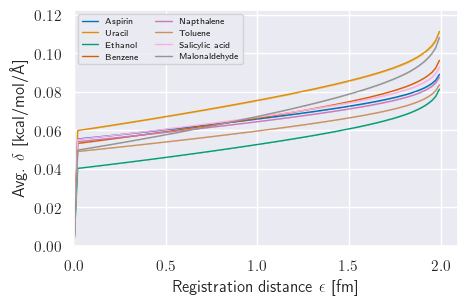

In [39]:
res = results.loc[results['std'] == 0.00001]
plot_dict_00001 = prepare_plot_dict(res)

sns.set_theme()
plot_results_dict(plot_dict_00001, 'Registration distance $\epsilon$ [fm]', 'Avg. $\delta$ [kcal/mol/Å] ', legend_params={'ncols': 2, 'fontsize': 6}, clip_on=True, zorder=None, budget_scaling=10**5,
                    keys=['Aspirin', 'Uracil', 'Ethanol', 'Benzene', 'Napthalene', 'Toluene', 'Salicylic acid', 'Malonaldehyde'])